Attributes cleaning

In [9]:
import pandas as pd

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/Business_Checkin_Three.csv", encoding="utf-8")
print(df["attributes"].head(10))
len(df)



0    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
1    {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
2    {'RestaurantsReservations': 'True', 'Restauran...
3    {'NoiseLevel': "u'quiet'", 'GoodForMeal': "{'d...
4    {'Smoking': "u'no'", 'NoiseLevel': "u'average'...
5    {'RestaurantsReservations': 'False', 'Caters':...
6    {'RestaurantsGoodForGroups': 'True', 'WiFi': "...
7    {'OutdoorSeating': 'True', 'RestaurantsPriceRa...
8    {'NoiseLevel': "u'average'", 'HasTV': 'True', ...
9    {'RestaurantsTakeOut': 'None', 'RestaurantsDel...
Name: attributes, dtype: object


30383

In [10]:
import ast

df = df[df["attributes"].notna()]

df["attributes_dict"] = df["attributes"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})


In [11]:
from collections import defaultdict, Counter

key_values = []

for attr in df["attributes_dict"]:
    if isinstance(attr, dict):
        for key, value in attr.items():
            if isinstance(value, dict):
                for subkey, subvalue in value.items():
                    key_values.append(f"{key}.{subkey}={subvalue}")
            else:
                key_values.append(f"{key}={value}")

top_features = Counter(key_values).most_common(50)
print("=== 高频词 ===")
for feature, count in top_features:
    print(f"{feature}: {count}")

non_boolean_keys = set()
for feature_val, _ in top_features:
    key_part, val_part = feature_val.split("=", 1)
    val_lower = val_part.lower()
    if val_lower not in ["true", "false"]:
        non_boolean_keys.add(key_part)

non_boolean_values = defaultdict(set)

for attr_dict in df["attributes_dict"]:
    if isinstance(attr_dict, dict):
        for key, value in attr_dict.items():
            if isinstance(value, dict):
                for subkey, subvalue in value.items():
                    full_key = f"{key}.{subkey}"
                    if full_key in non_boolean_keys:
                        non_boolean_values[full_key].add(str(subvalue))
            else:
                if key in non_boolean_keys:
                    non_boolean_values[key].add(str(value))

print("\nnon_boolean_values possible value")
for feature, values in non_boolean_values.items():
    print(f"{feature}: {values}")

    import pandas as pd


rows = []
for feature, values in non_boolean_values.items():

    values_str = "\n".join(sorted(values))
    rows.append([feature, values_str])

df_output = pd.DataFrame(rows, columns=["Feature", "Possible Values"])

df_output.to_excel("non_boolean_feature_values.xlsx", index=False, engine="openpyxl")

print(" the file：non_boolean_feature_values.xlsx")



=== 高频词 ===
BusinessAcceptsCreditCards=True: 25786
RestaurantsTakeOut=True: 22538
BikeParking=True: 15865
RestaurantsGoodForGroups=True: 15642
GoodForKids=True: 15390
RestaurantsDelivery=True: 14288
HasTV=True: 14139
RestaurantsPriceRange2=2: 13054
RestaurantsReservations=False: 12375
RestaurantsPriceRange2=1: 10572
OutdoorSeating=False: 10198
Caters=True: 10135
RestaurantsAttire=u'casual': 9983
OutdoorSeating=True: 9731
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}: 9159
NoiseLevel=u'average': 9148
WiFi=u'free': 8126
Alcohol=u'none': 7741
RestaurantsDelivery=False: 7684
Caters=False: 7101
WheelchairAccessible=True: 7070
RestaurantsReservations=True: 6653
RestaurantsAttire='casual': 6369
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}: 5722
RestaurantsTableService=True: 5632
WiFi=u'no': 5521
BusinessParking={'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet

In [12]:
# 筛选高频词
from collections import Counter

key_values = []

for attr in df["attributes_dict"]:
    for key, value in attr.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                key_values.append(f"{key}.{subkey}={subvalue}")
        else:
            key_values.append(f"{key}={value}")

top_features = Counter(key_values).most_common(50)  # 你可以改为更多
for feature, count in top_features:
    print(f"{feature}: {count}")


BusinessAcceptsCreditCards=True: 25786
RestaurantsTakeOut=True: 22538
BikeParking=True: 15865
RestaurantsGoodForGroups=True: 15642
GoodForKids=True: 15390
RestaurantsDelivery=True: 14288
HasTV=True: 14139
RestaurantsPriceRange2=2: 13054
RestaurantsReservations=False: 12375
RestaurantsPriceRange2=1: 10572
OutdoorSeating=False: 10198
Caters=True: 10135
RestaurantsAttire=u'casual': 9983
OutdoorSeating=True: 9731
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}: 9159
NoiseLevel=u'average': 9148
WiFi=u'free': 8126
Alcohol=u'none': 7741
RestaurantsDelivery=False: 7684
Caters=False: 7101
WheelchairAccessible=True: 7070
RestaurantsReservations=True: 6653
RestaurantsAttire='casual': 6369
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}: 5722
RestaurantsTableService=True: 5632
WiFi=u'no': 5521
BusinessParking={'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}: 4

In [13]:
from collections import defaultdict

non_boolean_values = defaultdict(set)

for attr_dict in df["attributes_dict"]:
    if isinstance(attr_dict, dict):
        for key, value in attr_dict.items():
            # 嵌套字典处理
            if isinstance(value, dict):
                for subkey, subvalue in value.items():
                    if str(subvalue).lower() not in ["true", "false"]:
                        non_boolean_values[f"{key}.{subkey}"].add(str(subvalue))
            else:
                if str(value).lower() not in ["true", "false"]:
                    non_boolean_values[key].add(str(value))

# 输出非布尔值特征和它们的所有取值
for feature, values in non_boolean_values.items():
    print(f"{feature}: {values}")


BusinessParking: {"{'garage': None, 'street': False, 'validated': False, 'lot': False, 'valet': False}", "{u'valet': False, u'garage': None, u'street': True, u'lot': True, u'validated': None}", "{'garage': True, 'street': True, 'validated': True, 'lot': False, 'valet': True}", "{u'garage': False, u'street': True, u'validated': False, u'lot': False, u'valet': False}", "{'garage': True, 'street': True, 'validated': True, 'lot': True, 'valet': False}", "{'garage': False, 'street': True, 'validated': False, 'lot': None, 'valet': False}", "{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}", "{u'valet': False, u'garage': False, u'street': False, u'lot': True, u'validated': False}", "{u'valet': False, u'garage': False, u'street': True, u'lot': None, u'validated': False}", "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': False}", "{'garage': True, 'street': False, 'validated': True, 'lot': False, 'valet': True}", "{'garage': Fal

In [14]:

import pandas as pd
import ast

df = pd.read_csv('/Users/emmali/PyCharmMiscProject/Business_Checkin_Three.csv')

def parse_attributes(attr_str):
    try:
        return ast.literal_eval(attr_str) if pd.notna(attr_str) else {}
    except Exception:
        return {}

df['attributes_dict'] = df['attributes'].apply(parse_attributes)

df['RestaurantsPriceRange2'] = df['attributes_dict'].apply(lambda x: x.get('RestaurantsPriceRange2', None))

df['RestaurantsPriceRange2'] = pd.to_numeric(df['RestaurantsPriceRange2'], errors='coerce')

df.to_csv(' with none.csv', index=False)
print(df[['business_id', 'RestaurantsPriceRange2']].head())


              business_id  RestaurantsPriceRange2
0  MTSW4McQd7CbVtyjqoe9mw                     1.0
1  mWMc6_wTdE0EUBKIGXDVfA                     NaN
2  MUTTqe8uqyMdBl186RmNeA                     2.0
3  ROeacJQwBeh05Rqg7F6TCg                     1.0
4  QdN72BWoyFypdGJhhI5r7g                     2.0


In [ ]:
df = df.dropna(subset=['RestaurantsPriceRange2'])

In [15]:
import pandas as pd
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

file_path = "/Users/emmali/PyCharmMiscProject/Business_Checkin_Three.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df = df[df["attributes"].notna()]

df["attributes_dict"] = df["attributes"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

def flatten_attributes(attr_dict):
    flattened = {}
    for key, value in attr_dict.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened[f"{key}.{subkey}={subvalue}"] = 1
        else:
            flattened[f"{key}={value}"] = 1
    return flattened

flattened_list = df["attributes_dict"].apply(flatten_attributes)
attributes_onehot = pd.DataFrame(flattened_list.tolist()).fillna(0).astype(int)

df["categories_list"] = df["categories"].fillna('').apply(lambda x: x.split(', ') if x else [])

mlb = MultiLabelBinarizer()
categories_onehot = pd.DataFrame(mlb.fit_transform(df["categories_list"]), columns=[f"cat_{c}" for c in mlb.classes_])

merged_df = pd.concat([
    df.reset_index(drop=True),
    attributes_onehot.reset_index(drop=True),
    categories_onehot.reset_index(drop=True)
], axis=1)

key_values = []
for attr in df["attributes_dict"]:
    for key, value in attr.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                key_values.append(f"{key}.{subkey}={subvalue}")
        else:
            key_values.append(f"{key}={value}")

top_features = Counter(key_values).most_common(30)
for feature, count in top_features:
    print(f"{feature}: {count}")

merged_df.to_csv("merged_with_onehot.csv", index=False)


BusinessAcceptsCreditCards=True: 25786
RestaurantsTakeOut=True: 22538
BikeParking=True: 15865
RestaurantsGoodForGroups=True: 15642
GoodForKids=True: 15390
RestaurantsDelivery=True: 14288
HasTV=True: 14139
RestaurantsPriceRange2=2: 13054
RestaurantsReservations=False: 12375
RestaurantsPriceRange2=1: 10572
OutdoorSeating=False: 10198
Caters=True: 10135
RestaurantsAttire=u'casual': 9983
OutdoorSeating=True: 9731
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}: 9159
NoiseLevel=u'average': 9148
WiFi=u'free': 8126
Alcohol=u'none': 7741
RestaurantsDelivery=False: 7684
Caters=False: 7101
WheelchairAccessible=True: 7070
RestaurantsReservations=True: 6653
RestaurantsAttire='casual': 6369
BusinessParking={'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}: 5722
RestaurantsTableService=True: 5632
WiFi=u'no': 5521
BusinessParking={'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}: 4

In [16]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/Business_Checkin_Three.csv")  # 替换为你的文件路径

def parse_attributes(attr_str):
    try:
        attr_dict = ast.literal_eval(attr_str) if pd.notnull(attr_str) else {}
        cleaned = {}
        for k, v in attr_dict.items():
            if isinstance(v, str):
                v_clean = v.lower()
                if v_clean == 'true':
                    cleaned[k] = 1
                elif v_clean == 'false':
                    cleaned[k] = 0
                else:
                    cleaned[f"{k}_{v_clean}"] = 1
            elif isinstance(v, bool):
                cleaned[k] = int(v)
        return cleaned
    except:
        return {}

attr_dicts = df['attributes'].apply(parse_attributes)
attr_df = pd.DataFrame(attr_dicts.tolist())

def parse_categories(cat_str):
    if pd.isnull(cat_str):
        return []
    return [c.strip() for c in cat_str.split(',')]

mlb = MultiLabelBinarizer()
cat_matrix = mlb.fit_transform(df['categories'].apply(parse_categories))
cat_df = pd.DataFrame(cat_matrix, columns=[f"cat_{c}" for c in mlb.classes_])

df_cleaned = pd.concat([df.drop(['attributes', 'categories'], axis=1), attr_df, cat_df], axis=1)

df_cleaned.to_csv("business_cleaned.csv", index=False)


In [17]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/output.csv", encoding="utf-8")

df = df[df["attributes"].notna()]
df["attributes_dict"] = df["attributes"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

key_counter = Counter()
for attr in df["attributes_dict"]:
    for key, value in attr.items():
        if not isinstance(value, dict):  # 只保留最外层
            key_counter[key] += 1

top_keys = [k for k, _ in key_counter.most_common(30)]

for key in top_keys:
    def extract_binary(attr_dict):
        val = attr_dict.get(key, None)
        if isinstance(val, str):
            if val.lower() == "true":
                return 1
            elif val.lower() == "false":
                return 0
        return None
    df[key] = df["attributes_dict"].apply(extract_binary)

def extract_price_range(attr_dict):
    val = attr_dict.get("RestaurantsPriceRange2", None)
    try:
        return int(val)
    except:
        return None

df["RestaurantsPriceRange2"] = df["attributes_dict"].apply(extract_price_range)

df = df.dropna(subset=["RestaurantsPriceRange2"])

df = df.drop(columns=["attributes_dict"])

df.to_csv("Business_Checkin_OneHot_WithoutNoneInPriceLevel.csv", index=False)

print(df[top_keys + ["RestaurantsPriceRange2"]].head())


   RestaurantsPriceRange2  BusinessAcceptsCreditCards BusinessParking  \
0                       1                         0.0            None   
1                       2                         1.0            None   
2                       1                         1.0            None   
3                       2                         1.0            None   
4                       1                         1.0            None   

   RestaurantsTakeOut  RestaurantsDelivery  BikeParking  OutdoorSeating  \
0                 1.0                  0.0          1.0             0.0   
1                 1.0                  1.0          NaN             1.0   
2                 1.0                  NaN          1.0             NaN   
3                 1.0                  1.0          1.0             0.0   
4                 1.0                  1.0          1.0             1.0   

   RestaurantsGoodForGroups  RestaurantsReservations  GoodForKids  ...  \
0                       NaN         

In [18]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("Business_Checkin_Three.csv", encoding="utf-8")

df = df[df["attributes"].notna()]
df["attributes_dict"] = df["attributes"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else {})

key_counter = Counter()
for attr in df["attributes_dict"]:
    for key, value in attr.items():
        if not isinstance(value, dict):
            key_counter[key] += 1

top_keys = [k for k, _ in key_counter.most_common(30)]

def extract_value(attr_dict, key):
    val = attr_dict.get(key, None)
    if isinstance(val, str):
        if val.lower() == "true":
            return 1
        elif val.lower() == "false":
            return 0
        else:
            return val
    return None

for key in top_keys:
    df[key] = df["attributes_dict"].apply(lambda d: extract_value(d, key))

true_values_map = {
    "Alcohol": ["'beer_and_wine'","'full_bar'","u'beer_and_wine'","u'full_bar'"]
    # "BusinessAcceptsCreditCards": ["'True'"]
}

for key, true_vals in true_values_map.items():
    if key in df.columns:
        df[key] = df[key].apply(
            lambda x: 1 if pd.notna(x) and str(x).lower() in true_vals else (0 if pd.notna(x) else None)
        )
false_values_map={
    "BusinessParking":["None","{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}","{'garage': False, 'street': False, 'validated': False, 'lot': None, 'valet': False}","{'garage': False, 'street': False, 'validated': None, 'lot': False, 'valet': False}","{'garage': False, 'street': False, 'validated': None, 'lot': None, 'valet': False}","{'garage': False, 'street': None, 'validated': False, 'lot': False, 'valet': False}","{'garage': False, 'street': None, 'validated': False, 'lot': None, 'valet': False}","{'garage': False, 'street': None, 'validated': None, 'lot': False, 'valet': False}","{'garage': False, 'street': None, 'validated': None, 'lot': None, 'valet': False}","{'garage': False, 'validated': False, 'street': False, 'lot': False, 'valet': False}","{'garage': False}","{'garage': None, 'street': False, 'validated': False, 'lot': False, 'valet': False}","{'garage': None, 'street': False, 'validated': False, 'lot': None, 'valet': False}","{'garage': None, 'street': False, 'validated': None, 'lot': False, 'valet': False}","{'garage': None, 'street': False, 'validated': None, 'lot': None, 'valet': False}","{'garage': None, 'street': None, 'validated': False, 'lot': False, 'valet': False}","{'garage': None, 'street': None, 'validated': False, 'lot': None, 'valet': False}","{'garage': None, 'street': None, 'validated': None, 'lot': False, 'valet': False}","{'valet': False, 'garage': False, 'street': False, 'lot': False, 'validated': False}","{'valet': False, 'garage': False, 'street': False, 'lot': True, 'validated': False}","{u'valet': False, u'garage': False, u'street': False, u'lot': False, u'validated': False}","{u'valet': False, u'garage': False, u'street': False, u'lot': None, u'validated': False}","{u'valet': False, u'garage': False, u'street': False, u'lot': None, u'validated': None}","{u'valet': False, u'garage': False, u'street': None, u'lot': False, u'validated': False}","{u'valet': False, u'garage': False, u'street': None, u'lot': False, u'validated': None}","{u'valet': False, u'garage': False, u'street': None, u'lot': None, u'validated': False}","{u'valet': False, u'garage': False, u'street': None, u'lot': None, u'validated': None}","{u'valet': False, u'garage': None, u'street': False, u'lot': False, u'validated': False}","{u'valet': False, u'garage': None, u'street': False, u'lot': False, u'validated': None}","{u'valet': False, u'garage': None, u'street': False, u'lot': None, u'validated': False}","{u'valet': False, u'garage': None, u'street': False, u'lot': None, u'validated': None}","{u'valet': False, u'garage': None, u'street': None, u'lot': False, u'validated': False}","{u'valet': False, u'garage': None, u'street': None, u'lot': False, u'validated': None}","{u'valet': False, u'garage': None, u'street': None, u'lot': None, u'validated': False}","{}"]


}

for key, false_vals in false_values_map.items():
    if key in df.columns:
        df[key] = df[key].apply(
            lambda x: 0 if pd.notna(x) and str(x) in false_vals else (1 if pd.notna(x) else None)
        )

wifi_mapping = {
    'free': 2,
    'paid': 1,
    'no': 0,
    'u\'free\'': 2,
    'u\'paid\'': 1,
    'u\'no\'': 0
}

if 'WiFi' in df.columns:
    df['WiFi'] = df['WiFi'].apply(
        lambda x: wifi_mapping.get(str(x).lower(), None) if pd.notna(x) else None
    )

noise_mapping = {
    'quiet': 0,
    'average': 1,
    'loud': 2,
    'very_loud': 3,
    'u\'quiet\'': 0,
    'u\'average\'': 1,
    'u\'loud\'': 2,
    'u\'very_loud\'': 3
}

if 'NoiseLevel' in df.columns:
    df['NoiseLevel'] = df['NoiseLevel'].apply(
        lambda x: noise_mapping.get(str(x).lower(), None) if pd.notna(x) else None
    )

attire_mapping = {
    'casual': 0,
    'dressy': 1,
    'formal': 2,
    'u\'casual\'': 0,
    'u\'dressy\'': 1,
    'u\'formal\'': 2
}

if 'RestaurantsAttire' in df.columns:
    df['RestaurantsAttire'] = df['RestaurantsAttire'].apply(
        lambda x: attire_mapping.get(str(x).lower(), None) if pd.notna(x) else None
    )


def extract_price_range(attr_dict):
    val = attr_dict.get("RestaurantsPriceRange2", None)
    try:
        return int(val)
    except:
        return None

df["RestaurantsPriceRange2"] = df["attributes_dict"].apply(extract_price_range)

df = df.dropna(subset=["RestaurantsPriceRange2"])


df = df.drop(columns=["attributes_dict"])

df.to_csv("Business_Checkin_OneHot_WithoutNoneInPriceLevel_withNotBull_test7.csv", index=False)

print(df[top_keys + ["RestaurantsPriceRange2"]].head())


  BusinessAcceptsCreditCards  BusinessParking RestaurantsTakeOut  \
0                          0              1.0                  1   
2                          1              1.0                  1   
3                          1              1.0                  1   
4                          1              1.0                  1   
5                          1              0.0                  1   

  RestaurantsPriceRange2 RestaurantsDelivery OutdoorSeating BikeParking  \
0                    1.0                   0              0           1   
2                    2.0                   1              1        None   
3                    1.0                None           None           1   
4                    2.0                   1              0           1   
5                    1.0                   1              1           1   

  RestaurantsReservations  WiFi HasTV  ... DogsAllowed BusinessAcceptsBitcoin  \
0                    None   2.0  None  ...        None     

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/Business_Checkin_Final.csv", encoding="utf-8")

target_column = 'stars'

factors_to_analyze = df.columns[14:]

for col in factors_to_analyze:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

for col in factors_to_analyze:
    df[col] = df[col].replace({'True': 1, 'False': 0, 'None': np.nan})
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df[[target_column] + factors_to_analyze.tolist()].dropna()

correlation_results = {}

for factor in factors_to_analyze:
    if pd.api.types.is_numeric_dtype(df_clean[factor]):
        correlation = df_clean[target_column].corr(df_clean[factor])
        correlation_results[factor] = correlation

correlation_df = pd.DataFrame(correlation_results.items(), columns=['factor', 'correlation value'])
correlation_df = correlation_df.sort_values(by='correlation value', ascending=False)
print(correlation_df)

for index, row in correlation_df.iterrows():
    factor = row['factor']
    corr_value = row['correlation value']
    if abs(corr_value) > 0.5:
        strength = 'strong'
    elif abs(corr_value) > 0.3:
        strength = 'middle'
    else:
        strength = 'weak'

    if corr_value > 0:
        direction = '+'
    elif corr_value < 0:
        direction = '-'
    else:
        direction = 'no linear relationship'

    print(f"factor '{factor}': correlation value {corr_value:.4f}，belongs to {strength} {direction}。")

                        factor  correlation value
15                 DogsAllowed           0.146709
6                  BikeParking           0.122182
3       RestaurantsPriceRange2           0.046705
8                         WiFi           0.040360
1              BusinessParking           0.031255
7      RestaurantsReservations           0.029568
0   BusinessAcceptsCreditCards           0.019626
4          RestaurantsDelivery           0.008609
12           RestaurantsAttire          -0.000986
5               OutdoorSeating          -0.028239
10                     Alcohol          -0.028672
2           RestaurantsTakeOut          -0.040361
11                 GoodForKids          -0.046194
14        WheelchairAccessible          -0.097399
13                  NoiseLevel          -0.131215
9                        HasTV          -0.239667
factor 'DogsAllowed': correlation value 0.1467，belongs to weak +。
factor 'BikeParking': correlation value 0.1222，belongs to weak +。
factor 'Restaurant

In [8]:
import pandas as pd
import ast
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/Final_needToAdd_FOrWiFi.csv", encoding="utf-8")

df_known = df[df['WiFi'].notna()]
df_missing = df[df['WiFi'].isna()]

features = ['BusinessParking', 'RestaurantsDelivery', 'RestaurantsTakeOut',
            'OutdoorSeating', 'HasTV', 'Alcohol', 'stars','BusinessAcceptsCreditCards','RestaurantsPriceRange2']


X_train = df_known[features]
y_train = df_known['WiFi']
X_pred = df_missing[features]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
wifi_predicted = model.predict(X_pred)

df.loc[df['WiFi'].isna(), 'WiFi'] = wifi_predicted

df.to_csv("Business_Checkin_addWiFi.csv", index=False)

print("WiFi missing value dealing. Rght now the distribution is:")
print(df['WiFi'].value_counts())


WiFi missing value dealing. Rght now the distribution is:
WiFi
2.0    3009
0.0    1790
1.0      18
Name: count, dtype: int64


In [9]:
import pandas as pd
import ast
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("Business_Checkin_addWiFi.csv", encoding="utf-8")

cols = [
    'BusinessAcceptsCreditCards',
    'RestaurantsTakeOut',
    'OutdoorSeating',
    'BikeParking',
    'RestaurantsReservations',
    'Alcohol',
    'HasTV',
    'GoodForKids'
]

for col in cols:
    df[f"{col}_is_missing"] = df[col].isna().astype(int)

    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("missing value were filled by midan")


df.to_csv("Business_Checkin_addMedian.csv", index=False)

print("One-Hot missing value have been filled.")


missing value were filled by midan
One-Hot missing value have been filled.


In [10]:
import pandas as pd
import ast
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

df = pd.read_csv("Business_Checkin_addMedian.csv", encoding="utf-8")

all_cats = df['categories'].dropna().str.lower().str.split(', ')
flat_cats = [cat.strip() for sublist in all_cats for cat in sublist]
cat_freq = Counter(flat_cats)

for cat, count in cat_freq.most_common(150):
    print(f"{cat}: {count}")



restaurants: 3723
food: 1987
nightlife: 795
bars: 765
sandwiches: 597
american (traditional): 588
pizza: 563
american (new): 484
breakfast & brunch: 460
coffee & tea: 446
italian: 383
fast food: 334
burgers: 325
specialty food: 318
event planning & services: 279
seafood: 275
mexican: 265
shopping: 264
chinese: 249
salad: 230
grocery: 230
cafes: 210
beer: 210
wine & spirits: 210
bakeries: 206
desserts: 206
chicken wings: 201
delis: 188
ice cream & frozen yogurt: 185
japanese: 167
sushi bars: 165
caterers: 162
sports bars: 158
convenience stores: 155
beauty & spas: 136
pubs: 132
asian fusion: 122
arts & entertainment: 121
barbers: 114
diners: 113
steakhouses: 108
cocktail bars: 101
juice bars & smoothies: 101
barbeque: 95
lounges: 94
drugstores: 88
mediterranean: 88
vegetarian: 80
wine bars: 79
cheesesteaks: 79
thai: 78
venues & event spaces: 78
donuts: 78
food delivery services: 74
latin american: 73
bagels: 72
soup: 71
indian: 70
food trucks: 69
greek: 67
hair salons: 63
vegan: 61
hote

In [11]:
import pandas as pd
import ast
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/Business_Checkin_OneHot_WithoutNoneInPriceLevel_withNotBull_test7.csv", encoding="utf-8")

category_map = {
    "Chinese": ["chinese", "noodles", "hot pot", "szechuan"],
    "Japanese": ["japanese", "sushi bars", "ramen"],
    "Korean": ["korean"],
    "Thai": ["thai"],
    "Indian": ["indian", "pakistani"],
    "Vietnamese": ["vietnamese"],
    "Asian Fusion": ["asian fusion"],
    "Mexican": ["mexican", "tacos", "tex-mex"],
    "Latin American": ["latin american", "cuban", "caribbean", "spanish"],
    "Italian": ["italian", "pizza", "pasta"],
    "American": ["american (traditional)", "american (new)", "burgers", "steakhouses", "bbq", "barbeque", "chicken wings", "southern", "comfort food"],
    "Mediterranean": ["mediterranean", "greek", "middle eastern", "halal"],
    "Dessert": ["desserts", "ice cream & frozen yogurt", "bakeries", "cupcakes", "donuts", "gelato", "chocolatiers & shops", "shaved ice"],
    "Cafe": ["cafes", "coffee & tea", "bubble tea", "tea rooms", "coffee roasteries", "internet cafes"],
    "Fast Food": ["fast food", "sandwiches", "hot dogs", "chicken shop", "wraps", "delis", "cheesesteaks", "buffets"],
    "Vegetarian": ["vegetarian", "vegan", "gluten-free", "organic stores", "health markets"]
}

reverse_map = {}
for main_cat, subcats in category_map.items():
    for sub in subcats:
        reverse_map[sub.lower()] = main_cat

def clean_categories(cat_str):
    if pd.isna(cat_str):
        return []
    return [c.strip().lower() for c in cat_str.split(",")]

df['categories_list'] = df['categories'].apply(clean_categories)

def map_to_main_categories(cat_list):
    labels = set()
    for c in cat_list:
        if c in reverse_map:
            labels.add(reverse_map[c])
    return list(labels)

df['main_categories'] = df['categories_list'].apply(map_to_main_categories)

df_exploded = df.explode('main_categories')

one_hot = pd.get_dummies(df_exploded['main_categories'])
one_hot = one_hot.groupby(level=0).max()

df = pd.concat([df, one_hot], axis=1)


bool_cols = one_hot.columns
df[bool_cols] = df[bool_cols].astype(int)

df.to_csv("data_with_onehot_withCategory200000.csv", index=False)

print("done. new file: data_with_onehot.csv")


done. new file: data_with_onehot.csv


In [12]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import random


df = pd.read_csv("/Users/emmali/PyCharmMiscProject/data_with_onehot_withCategory200000.csv")
df = df[df['state'].isin(['CA', 'PA', 'FL'])].copy()

cuisine_columns = [
    'American', 'Asian Fusion', 'Cafe', 'Chinese', 'Dessert', 'Fast Food',
    'Indian', 'Italian', 'Japanese', 'Korean', 'Latin American',
    'Mediterranean', 'Mexican', 'Thai', 'Vegetarian', 'Vietnamese'
]

df['main_cuisine'] = df[cuisine_columns].idxmax(axis=1)

cuisine_colors = {}
color_palette = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred',
                 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'gray',
                 'lightgray', 'black', 'lightblue']

random.shuffle(color_palette)
for cuisine, color in zip(cuisine_columns, color_palette):
    cuisine_colors[cuisine] = color

map_center = [37.5, -95]
m = folium.Map(location=map_center, zoom_start=5, tiles='CartoDB positron')

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    name = row['name']
    cuisine = row['main_cuisine']
    stars = row['stars']
    color = cuisine_colors.get(cuisine, 'gray')

    popup_text = f"<b>{name}</b><br>{cuisine}<br>{stars} ⭐"
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.8,
        popup=popup_text
    ).add_to(marker_cluster)
from branca.element import Element

legend_html = """
<div style="
     position: fixed;
     bottom: 20px; left: 20px; width: 200px; height: 400px;
     z-index:9999; font-size:14px;
     background-color: white; padding: 10px; border:2px solid gray; overflow-y: scroll;">
<b>Cuisine Legend</b><br>
""" + "".join([
    f'<i style="background:{cuisine_colors[cuisine]};width:10px;height:10px;display:inline-block;margin-right:5px;"></i>{cuisine}<br>'
    for cuisine in cuisine_columns]) + """
</div>
"""

legend = Element(legend_html)
m.get_root().html.add_child(legend)

m.save("restaurant_map.html")
print("succeed！restaurant_map.html")

succeed！restaurant_map.html


In [4]:
import pandas as pd
import numpy as np
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import io
import base64

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/All_for_area_with_cate.csv", encoding="utf-8")

cuisines = [
    "American", "Asian Fusion", "Cafe", "Chinese", "Dessert", "Fast Food", "Indian",
    "Italian", "Japanese", "Korean", "Latin American", "Mediterranean",
    "Mexican", "Thai", "Vegetarian", "Vietnamese"
]

features = df[["latitude", "longitude"] + cuisines]
X_scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=0)
df["region"] = kmeans.fit_predict(X_scaled)

region_cuisine_pref = df.groupby("region")[cuisines].mean()

region_vector_1d = PCA(n_components=1).fit_transform(region_cuisine_pref)
region_vector_1d = (region_vector_1d - region_vector_1d.min()) / (region_vector_1d.max() - region_vector_1d.min())
region_color_strength = dict(zip(region_cuisine_pref.index, region_vector_1d.flatten()))

def get_hsb_color(value):
    hue = (1 - value) * 0.4  # green -> red
    rgb = mcolors.hsv_to_rgb([hue, 1, 1])
    return mcolors.to_hex(rgb)

from scipy.spatial import Voronoi
from shapely.geometry import Polygon
region_centers = df.groupby("region")[["latitude", "longitude"]].mean().reset_index()
points = region_centers[["longitude", "latitude"]].values

def voronoi_finite_polygons_2d(vor, radius=10):
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    all_ridges = {}

    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0: continue
            t = vor.points[p2] - vor.points[p1]
            t = t / np.linalg.norm(t)
            n = np.array([-t[1], t[0]])
            midpoint = vor.points[[p1, p2]].mean(axis=0)
            far_point = vor.vertices[v2] + n * radius
            new_vertices.append(far_point.tolist())
            new_region.append(len(new_vertices) - 1)
        new_regions.append(new_region)
    return new_regions, np.asarray(new_vertices)

vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)

m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=5)

for region_index, region in enumerate(regions):
    polygon = vertices[region]
    poly_coords = [(lat, lon) for lon, lat in polygon]
    region_id = region_centers.iloc[region_index]["region"]
    color_val = region_color_strength[region_id]
    color = get_hsb_color(color_val)

    folium.Polygon(
        locations=poly_coords,
        fill=True,
        color=color,
        fill_opacity=0.3,
        weight=1,
        popup=f"Region {int(region_id)} - Preference: {color_val:.2f}"
    ).add_to(m)

for _, row in df.iterrows():
    region = row['region']
    color = get_hsb_color(region_color_strength[region])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        color=color,
        weight=0
    ).add_to(m)

def generate_radar_chart(data, region_id):
    labels = list(data.index)
    values = data.values.tolist()
    labels += labels[:1]
    values += values[:1]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color="red", linewidth=2)
    ax.fill(angles, values, color="red", alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], fontsize=6)
    ax.set_yticklabels([])
    ax.set_title(f"Region {region_id}", fontsize=8)
    ax.grid(True)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=120)
    plt.close(fig)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

for _, row in region_centers.iterrows():
    region_id = int(row["region"])
    cuisine_pref = region_cuisine_pref.loc[region_id]
    radar_img = generate_radar_chart(cuisine_pref, region_id)
    popup_html = f'<img src="data:image/png;base64,{radar_img}">'
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(m)

legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 220px; height: 110px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    ">
    <b>Region Cuisine Preference</b><br>
    <i>From low (green) to high (red)</i><br>
    <div style="width: 100%; height: 20px; background: linear-gradient(to right, green, red);"></div>
    <div style="display: flex; justify-content: space-between;">
        <span>Low</span>
        <span>High</span>
    </div>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m.save("restaurant_voronoi_radar_map.html")


In [13]:
import pandas as pd
import ast
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/allForArea.csv", encoding="utf-8")

category_map = {
    "Chinese": ["chinese", "noodles", "hot pot", "szechuan"],
    "Japanese": ["japanese", "sushi bars", "ramen"],
    "Korean": ["korean"],
    "Thai": ["thai"],
    "Indian": ["indian", "pakistani"],
    "Vietnamese": ["vietnamese"],
    "Asian Fusion": ["asian fusion"],
    "Mexican": ["mexican", "tacos", "tex-mex"],
    "Latin American": ["latin american", "cuban", "caribbean", "spanish"],
    "Italian": ["italian", "pizza", "pasta"],
    "American": ["american (traditional)", "american (new)", "burgers", "steakhouses", "bbq", "barbeque",
                 "chicken wings", "southern", "comfort food"],
    "Mediterranean": ["mediterranean", "greek", "middle eastern", "halal"],
    "Dessert": ["desserts", "ice cream & frozen yogurt", "bakeries", "cupcakes", "donuts", "gelato",
                "chocolatiers & shops", "shaved ice"],
    "Cafe": ["cafes", "coffee & tea", "bubble tea", "tea rooms", "coffee roasteries", "internet cafes"],
    "Fast Food": ["fast food", "sandwiches", "hot dogs", "chicken shop", "wraps", "delis", "cheesesteaks", "buffets"],
    "Vegetarian": ["vegetarian", "vegan", "gluten-free", "organic stores", "health markets"]
}

reverse_map = {}
for main_cat, subcats in category_map.items():
    for sub in subcats:
        reverse_map[sub.lower()] = main_cat

def clean_categories(cat_str):
    if pd.isna(cat_str):
        return []
    return [c.strip().lower() for c in cat_str.split(",")]


df['categories_list'] = df['categories'].apply(clean_categories)

def map_to_main_categories(cat_list):
    labels = set()
    for c in cat_list:
        if c in reverse_map:
            labels.add(reverse_map[c])
    return list(labels)


df['main_categories'] = df['categories_list'].apply(map_to_main_categories)

df_exploded = df.explode('main_categories')

one_hot = pd.get_dummies(df_exploded['main_categories'])
one_hot = one_hot.groupby(level=0).max()

df = pd.concat([df, one_hot], axis=1)

bool_cols = one_hot.columns
df[bool_cols] = df[bool_cols].astype(int)

df.to_csv("/Users/emmali/PyCharmMiscProject/All_for_area_with_cate.csv", index=False)

print("done, new file data_with_onehot.csv")


处理完成，已生成带 One-Hot 编码的新文件 data_with_onehot.csv


In [29]:
!pip install  scipy scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
!pip install smogn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install smogn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd

df1 = pd.read_csv("/Users/emmali/PyCharmMiscProject/final_withCategory_withDataFill.csv")
df2 = pd.read_csv("/Users/emmali/PyCharmMiscProject/final_with_preferrence.csv")

merged_df = df1.merge(
    df2[["business_id", "local_cuisine_preference_score"]],
    on="business_id",
    how="left"
)

merged_df.to_csv("With_ALL.csv", index=False)

print(merged_df.head(10))

              business_id                                        name  \
0  MTSW4McQd7CbVtyjqoe9mw                          St Honore Pastries   
1  MUTTqe8uqyMdBl186RmNeA                                    Tuna Bar   
2  ROeacJQwBeh05Rqg7F6TCg                                         BAP   
3  QdN72BWoyFypdGJhhI5r7g                                     Bar One   
4  Mjboz24M9NlBeiOJKLEd_Q                            DeSandro on Main   
5  kV_Q1oqis8Qli8dUoGpTyQ                               Ardmore Pizza   
6  aPNXGTDkf-4bjhyMBQxqpQ                                  Craft Hall   
7  2xVsWBNFwZOxIOdd9Mwnww                    Cheeseburger In Paradise   
8  qfWJmJ0g96eM_fWma3ja0g  Doc Magrogan's Oyster House - West Chester   
9  -4dYswJy7SPcbcERvitmIg                                    Pathmark   

                address          city state  postal_code   latitude  \
0           935 Race St  Philadelphia    PA        19107  39.955505   
1           205 Race St  Philadelphia    PA        191

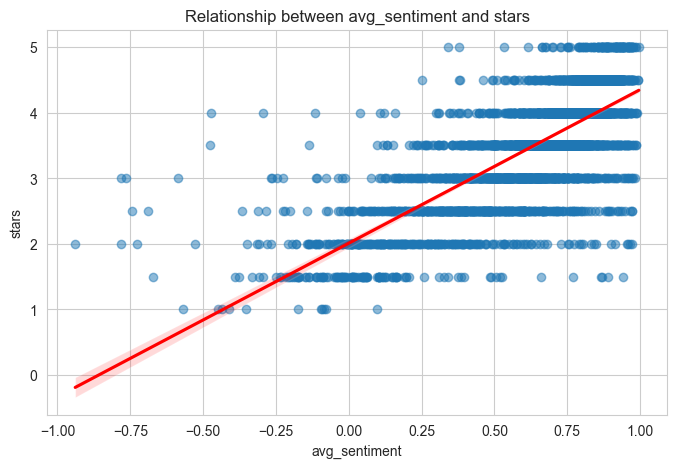

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/With_ALL.csv")

feature = "avg_sentiment"
target = "stars"

plt.figure(figsize=(8, 5))
sns.regplot(
    x=df[feature],
    y=df[target],
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f"Relationship between {feature} and {target}")
plt.xlabel(feature)
plt.ylabel(target)
plt.show()


 fill missing data by average：
filled

 final number of data：4546 
degree: 1：train R² = 0.4912，test R² = 0.4415
degree: 2：train R² = 0.4928，test R² = 0.4455
degree: 3：train R² = 0.4953，test R² = 0.4463
degree: 4：train R² = 0.4993，test R² = 0.4504
degree: 5：train R² = 0.4998，test R² = 0.4530

best degree：5，best test R² = 0.4530


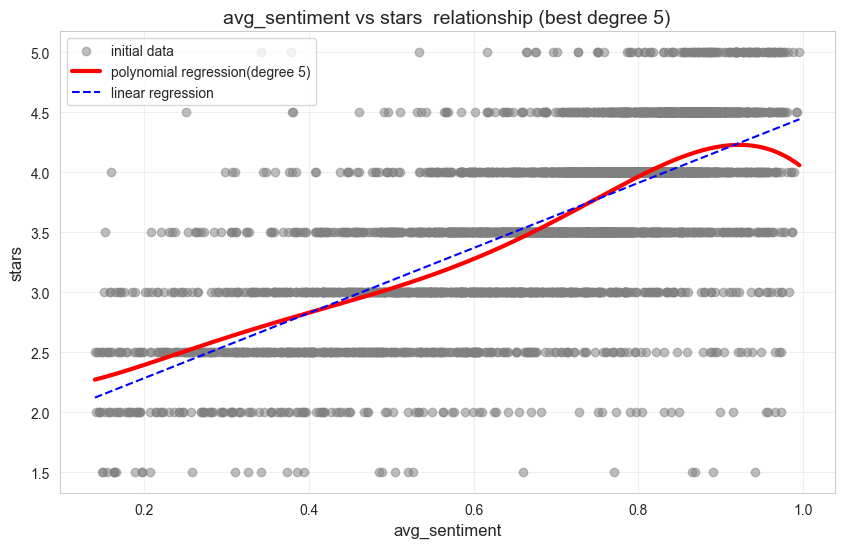


best formula (standardized)：
stars ≈ 3.63 + -0.57*x_scaled_1 + 7.10*x_scaled_2 + ...
（x_scaled has been standardized


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("/Users/emmali/PyCharmMiscProject/With_ALL.csv")

if df.isnull().any().any():
    print("\n fill missing data by average：")
    df = df.fillna(df.mean(numeric_only=True))
    print("filled")

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = remove_outliers(df, "avg_sentiment")
df = remove_outliers(df, "stars")
print(f"\n final number of data：{len(df)} ")

X = df[["avg_sentiment"]].values
y = df["stars"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

degrees = [1, 2, 3, 4, 5]
best_r2 = 0
best_degree = 1

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)

    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"degree: {degree}：train R² = {train_r2:.4f}，test R² = {test_r2:.4f}")

    if test_r2 > best_r2:
        best_r2 = test_r2
        best_degree = degree
        best_model = model
        best_poly = poly
        best_scaler = scaler

print(f"\nbest degree：{best_degree}，best test R² = {best_r2:.4f}")

X_full_poly = best_poly.transform(X)
X_full_poly_scaled = best_scaler.transform(X_full_poly)
y_full_pred = best_model.predict(X_full_poly_scaled)

sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_sorted_pred = y_full_pred[sorted_indices]

plt.figure(figsize=(10, 6))

plt.scatter(X, y, alpha=0.5, color="gray", label="initial data")

plt.plot(X_sorted, y_sorted_pred, color="red", linewidth=3, label=f"polynomial regression(degree {best_degree})")

poly_linear = PolynomialFeatures(degree=1, include_bias=False)
X_linear = poly_linear.fit_transform(X)
model_linear = LinearRegression().fit(X_linear, y)
y_linear_pred = model_linear.predict(X_linear)
plt.plot(X_sorted, y_linear_pred[np.argsort(X[:, 0])], color="blue", linestyle="--", label="linear regression")

plt.xlabel("avg_sentiment", fontsize=12)
plt.ylabel("stars", fontsize=12)
plt.title(f"avg_sentiment vs stars  relationship (best degree {best_degree})", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

coef = best_model.coef_
intercept = best_model.intercept_
print("\nbest formula (standardized)：")
print(f"stars ≈ {intercept:.2f} + {coef[0]:.2f}*x_scaled_1 + {coef[1]:.2f}*x_scaled_2 + ...")
print("（x_scaled has been standardized)")


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

X = df[['avg_sentiment']].values
y = df['stars'].values

def custom_acc(y_true, y_pred, tol=0.25):
    return np.mean(np.abs(y_true - y_pred) <= tol)

acc_scorer = make_scorer(custom_acc, greater_is_better=True)

lin_reg = LinearRegression()
poly_reg = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())


kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y, name):
    mse_scores = -cross_val_score(model, X, y, cv=kf,
                                  scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    acc_scores = cross_val_score(model, X, y, cv=kf, scoring=acc_scorer)

    print(f"\n=== {name} ===")
    print(f"Mean MSE: {np.mean(mse_scores):.4f}")
    print(f"Mean R²:  {np.mean(r2_scores):.4f}")
    print(f"Mean ACC: {np.mean(acc_scores):.4f}")

evaluate_model(lin_reg, X, y, "Linear Regression")
evaluate_model(poly_reg, X, y, "Polynomial Regression (degree=5)")



=== Linear Regression ===
Mean MSE: 0.2657
Mean R²:  0.4797
Mean ACC: 0.4015

=== Polynomial Regression (degree=5) ===
Mean MSE: 0.2614
Mean R²:  0.4882
Mean ACC: 0.3949
